In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Plotly and Cufflinks setup

#!pip install plotly
#!pip install cufflinks
#!pip install chart_studio

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) #requires version >= 1.9.0

import cufflinks as cf

#for Notebooks
init_notebook_mode(connected = True)

#for offline use
cf.go_offline()

5.1.0


# Loading Data

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#path = "/content/drive/MyDrive/8.Pakistan_Largest_Ecommerce_Dataset/Pakistan Largest Ecommerce Dataset.csv"

In [6]:
path = "C:/users/Mazhar/Projects_Jupyter/8.Pakistan_Largest_Ecommerce_Dataset/Pakistan Largest Ecommerce Dataset.csv"

In [7]:
df = pd.read_csv(path,  parse_dates = ["M-Y"], low_memory = False, na_values = ["NaN", 'NaT', ' -   '])

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,2016-07-01,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,2016-07-01,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,2016-07-01,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,2016-07-01,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,2016-07-01,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df)

1048575

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  object        
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  ob

# Data Pre-Processing

### Droping off Un-necessary Columns

In [12]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

#### Droping Columns = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']

In [13]:
drop_columns_0 = df.columns[-5:]
drop_columns_0

Index(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [14]:
df.drop(drop_columns_0, axis = 1, inplace = True)

#### Droping Columns "items_id", "created_at", "increment_id", "sales_commission_code", "Working Date" , "BI Status" , "Year", "Month", "FY"

In [15]:
drop_columns_1 = ["item_id", "created_at", "increment_id", "sales_commission_code", "Working Date" , "BI Status" , "Year", "Month", "Customer Since", "FY"]

In [16]:
df.drop(drop_columns_1, axis = 1, inplace = True)

### Re arranging Columns

In [17]:
df = df[['Customer ID', 'sku', 'category_name_1', 'status', 'qty_ordered',  'price', 'grand_total',
       'discount_amount', ' MV ', 'payment_method', 'M-Y']]

#### Check For Missing Data

In [18]:
missing = pd.DataFrame(df.isnull().sum())
missing.transpose()

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,M-Y
0,464062,464071,464215,464066,464051,464051,464051,464051,466283,464051,464051


In [19]:
total_missing_values = df.isnull().sum().sum()
total_missing_values

5107003

### Droping off Missing Values Rows

In [20]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [21]:
#Checking again for missing values
missing = pd.DataFrame(df.isnull().sum())
missing.transpose()

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,M-Y
0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#Checking again
total_missing_values = df.isnull().sum().sum()
total_missing_values

0

In [23]:
#Checking again for missing values in ' MV ' col
df[' MV '].isnull().sum()#.sum()

0

In [24]:
df.head(5)

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,M-Y
0,1.0,kreations_YI 06-L,Women's Fashion,complete,1.0,1950.0,1950.0,0.0,"1,950",cod,2016-07-01
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,canceled,1.0,240.0,240.0,0.0,240,cod,2016-07-01
2,3.0,Ego_UP0017-999-MR0,Women's Fashion,canceled,1.0,2450.0,2450.0,0.0,"2,450",cod,2016-07-01
3,4.0,kcc_krone deal,Beauty & Grooming,complete,1.0,360.0,60.0,300.0,360,cod,2016-07-01
4,5.0,BK7010400AG,Soghaat,order_refunded,2.0,555.0,1110.0,0.0,"1,110",cod,2016-07-01


In [25]:
len(df)

582100

In [26]:
df['M-Y'].unique()

array(['2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
df['M-Y'].nunique()

26

In [28]:
df['M-Y'].value_counts()

2017-11-01    83726
2016-11-01    71482
2018-03-01    41755
2017-05-01    34651
2018-05-01    27719
2018-02-01    26827
2017-08-01    25070
2017-04-01    21675
2017-03-01    19528
2017-06-01    19451
2017-07-01    19195
2017-10-01    17410
2017-12-01    15540
2016-09-01    15432
2018-06-01    14651
2016-12-01    13425
2017-01-01    13170
2016-10-01    13119
2018-01-01    12689
2018-04-01    12057
2018-08-01    11873
2017-02-01    11860
2016-08-01    11524
2018-07-01    11019
2016-07-01     8826
2017-09-01     8426
Name: M-Y, dtype: int64

### Looking for 0 (zeros) in integer or float value columns

In [29]:
df[df['qty_ordered'] == 0]['qty_ordered'].value_counts()

Series([], Name: qty_ordered, dtype: int64)

In [30]:
df[df['price'] == 0]['price'].value_counts()

Series([], Name: price, dtype: int64)

In [31]:
df[df[' MV '] == '0'][' MV '].value_counts()

Series([], Name:  MV , dtype: int64)

In [32]:
df[df['grand_total'] == 0]['grand_total'].value_counts()

0.0    9465
Name: grand_total, dtype: int64

In [33]:
#found 9465 cells containing 0.0 in column 'grand_total'
#replace 0.0 from corresponding values of ' MV ' column

In [34]:
def replace_zeros(x, y):
    if x == 0:
        return y
    else: 
        return x

In [35]:
df.columns

Index(['Customer ID', 'sku', 'category_name_1', 'status', 'qty_ordered',
       'price', 'grand_total', 'discount_amount', ' MV ', 'payment_method',
       'M-Y'],
      dtype='object')

In [36]:
df['grand_total'] = df.apply(lambda z: replace_zeros(z['grand_total'], z[' MV ']), axis = 1)

In [37]:
#Checking again
df[df['grand_total'] == 0]['grand_total'].value_counts()

Series([], Name: grand_total, dtype: int64)

### Now DataFrame Without 0(Zeros) and Null Values

In [38]:
df.head(5)

,Customer ID,sku,category_name_1,status,qty_ordered,price,grand_total,discount_amount,MV,payment_method,M-Y
0,1.0,kreations_YI 06-L,Women's Fashion,complete,1.0,1950.0,1950.0,0.0,"1,950",cod,2016-07-01
1,2.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,canceled,1.0,240.0,240.0,0.0,240,cod,2016-07-01
2,3.0,Ego_UP0017-999-MR0,Women's Fashion,canceled,1.0,2450.0,2450.0,0.0,"2,450",cod,2016-07-01
3,4.0,kcc_krone deal,Beauty & Grooming,complete,1.0,360.0,60.0,300.0,360,cod,2016-07-01
4,5.0,BK7010400AG,Soghaat,order_refunded,2.0,555.0,1110.0,0.0,"1,110",cod,2016-07-01


In [39]:
len(df)

582100

In [40]:
df.columns

Index(['Customer ID', 'sku', 'category_name_1', 'status', 'qty_ordered',
       'price', 'grand_total', 'discount_amount', ' MV ', 'payment_method',
       'M-Y'],
      dtype='object')

**Task 6: Predict and Forecasting**

In [41]:
df_no_of_orders_cat = pd.crosstab(df['M-Y'], df['category_name_1']) #, margins = True
df_no_of_orders_cat

category_name_1,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion,\N
M-Y,,,,,,,,,,,,,,,,
2016-07-01,378,2425,22,214,64,181,389,160,1003,820,35,177,1746,12,469,731
2016-08-01,339,1846,165,203,91,371,427,509,2587,1792,54,241,1843,251,628,177
2016-09-01,1226,1405,37,487,851,433,760,461,1264,3318,355,94,1771,993,967,1010
2016-10-01,616,1388,73,237,291,532,619,578,1954,1724,163,177,2754,242,966,805
2016-11-01,6279,5754,89,2616,1892,1972,2984,1116,15719,11837,1117,311,6382,4889,5710,2815
2016-12-01,860,1080,52,317,333,671,451,591,2840,2786,89,203,1748,237,885,282
2017-01-01,636,880,39,292,267,511,358,497,2022,3045,120,162,1706,1012,1282,341
2017-02-01,314,685,43,194,200,561,724,360,2079,3124,109,71,1029,677,1488,202
2017-03-01,1452,1239,97,448,691,495,1014,758,2554,4218,141,224,1183,361,4432,221


In [42]:
df[df['M-Y'] == '2016-08-01']['category_name_1'].value_counts()

Men's Fashion         2587
Beauty & Grooming     1846
Soghaat               1843
Mobiles & Tablets     1792
Women's Fashion        628
Kids & Baby            509
Home & Living          427
Health & Sports        371
Appliances             339
Superstore             251
School & Education     241
Computing              203
\N                     177
Books                  165
Entertainment           91
Others                  54
Name: category_name_1, dtype: int64

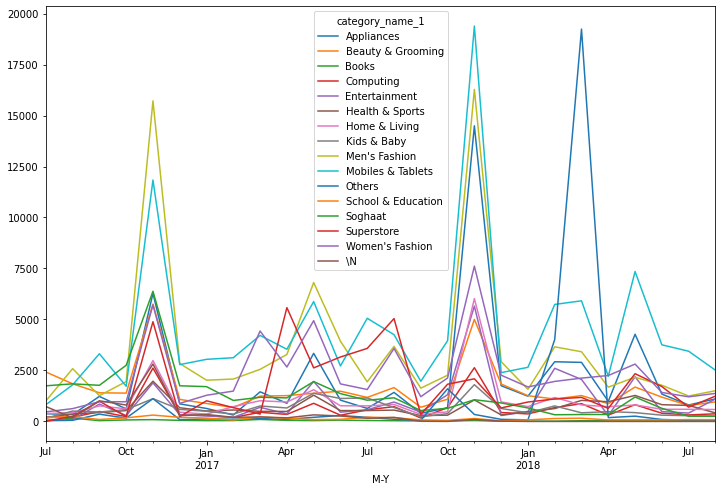

In [43]:
df_no_of_orders_cat.plot(figsize = (12, 8), legend = True)
plt.show()

In [44]:
# layout = go.Layout(title = "Number of Orders Per Category", 
#                    xaxis = {'title': 'Month-Year'}, 
#                    yaxis = {'title': 'No. of Orders'}, 
#                    showlegend = True, 
#                    width = 1000, 
#                    height = 600,)

# df_no_of_orders_cat.iplot(kind = 'line', layout = layout) 

In [45]:
# import plotly.express as px

# fig = px.line(df_no_of_orders_cat)

# fig.update_xaxes(title_text='Month-Year')
# fig.update_yaxes(title_text='No. of Orders')

# fig.show()

In [46]:
df = df_no_of_orders_cat

In [47]:
df.head(2)

category_name_1,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion,\N
M-Y,,,,,,,,,,,,,,,,
2016-07-01,378,2425,22,214,64,181,389,160,1003,820,35,177,1746,12,469,731
2016-08-01,339,1846,165,203,91,371,427,509,2587,1792,54,241,1843,251,628,177


In [48]:
#df['Appliances']

In [49]:
df_new = df["Men's Fashion"]

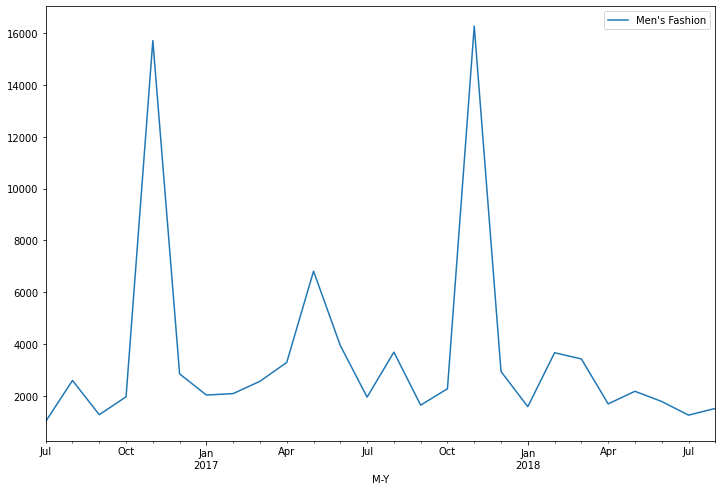

In [50]:
df_new.plot(figsize = (12, 8), legend = True)
plt.show()

In [51]:
df.index

DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='M-Y', freq=None)

### Determine the rolling statistics

In [52]:
rolmean = df_new.rolling(window = 12).mean()
rolstd = df_new.rolling(window = 12).std()

In [53]:
#rolmean, rolstd

### Plot rolling statistics

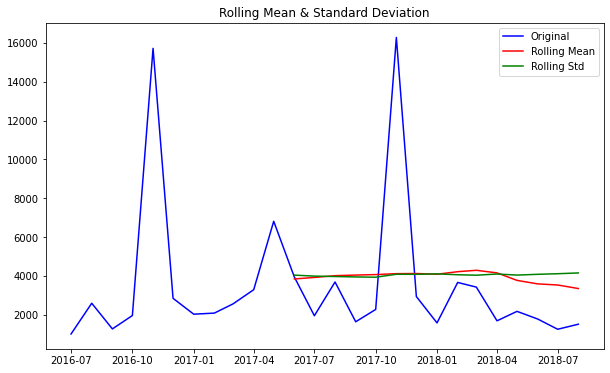

In [54]:
plt.figure(figsize = (10, 6))
orig = plt.plot(df_new, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("Rolling Mean & Standard Deviation")
plt.show(block = False)

### Perform Dickey-Fuller Test

In [55]:
# Need to have p-value around 0.5 or less to have data stationary

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
print("Results of Diceky-Fuller Test:\n")

dftest = adfuller(df_new, autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-Value', '#Lags Used', 'No. of Obeservations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

dfoutput

Results of Diceky-Fuller Test:



Test Statistics              -5.110690
p-Value                       0.000013
#Lags Used                    0.000000
No. of Obeservations Used    25.000000
Critical Value (1%)          -3.723863
Critical Value (5%)          -2.986489
Critical Value (10%)         -2.632800
dtype: float64

### Estimate the Trend

In [58]:
#to make data stationary it depends on data sometime you need to take log of data, square of data, or cube of data
#in this case we already have stationary data as seen in 'Dickey-Fuller Test' and in the plot of 'Rolling Statistics'
#we are doing following steps only for illustration

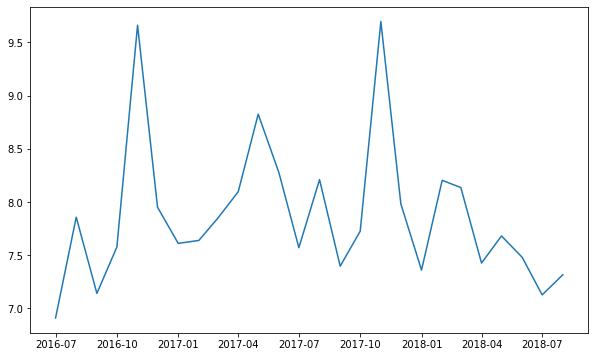

In [59]:
plt.figure(figsize = (10, 6))
data_logScale = np.log(df_new)
plt.plot(data_logScale)
plt.show()

In [60]:
data_logScale

M-Y
2016-07-01    6.910751
2016-08-01    7.858254
2016-09-01    7.142037
2016-10-01    7.577634
2016-11-01    9.662625
2016-12-01    7.951559
2017-01-01    7.611842
2017-02-01    7.639642
2017-03-01    7.845416
2017-04-01    8.096817
2017-05-01    8.826001
2017-06-01    8.277666
2017-07-01    7.571474
2017-08-01    8.210940
2017-09-01    7.397562
2017-10-01    7.726213
2017-11-01    9.697693
2017-12-01    7.983099
2018-01-01    7.360740
2018-02-01    8.204672
2018-03-01    8.136518
2018-04-01    7.427144
2018-05-01    7.681560
2018-06-01    7.480992
2018-07-01    7.127694
2018-08-01    7.317212
Name: Men's Fashion, dtype: float64

### Calculate Moving Average with the Same Window

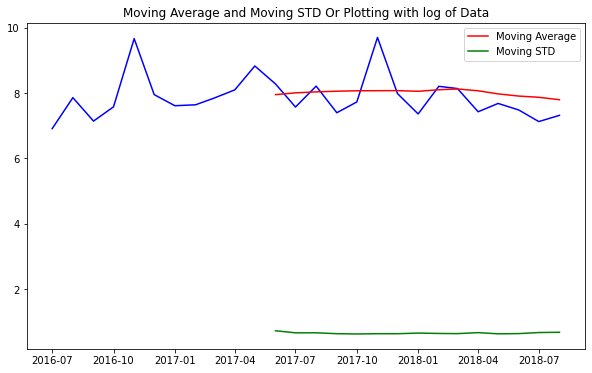

In [61]:
plt.figure(figsize = (10, 6))
movingAverage = data_logScale.rolling(window = 12).mean()
movingSTD = data_logScale.rolling(window = 12).std()
plt.plot(data_logScale, color = 'blue')
plt.plot(movingAverage, color = 'red', label = 'Moving Average')
plt.plot(movingSTD, color = 'green', label = 'Moving STD')
plt.legend(loc = 'best')
plt.title('Moving Average and Moving STD Or Plotting with log of Data')
plt.show()

In [62]:
movingAverage

M-Y
2016-07-01         NaN
2016-08-01         NaN
2016-09-01         NaN
2016-10-01         NaN
2016-11-01         NaN
2016-12-01         NaN
2017-01-01         NaN
2017-02-01         NaN
2017-03-01         NaN
2017-04-01         NaN
2017-05-01         NaN
2017-06-01    7.950020
2017-07-01    8.005081
2017-08-01    8.034471
2017-09-01    8.055765
2017-10-01    8.068146
2017-11-01    8.071069
2017-12-01    8.073697
2018-01-01    8.052772
2018-02-01    8.099858
2018-03-01    8.124116
2018-04-01    8.068310
2018-05-01    7.972940
2018-06-01    7.906550
2018-07-01    7.869569
2018-08-01    7.795092
Name: Men's Fashion, dtype: float64

### Calculate difference b/w Log Scale Data and Moving Average

In [63]:
data_LogScale_Minus_movingAverage = data_logScale - movingAverage
data_LogScale_Minus_movingAverage

#Remove NaN Values
data_LogScale_Minus_movingAverage.dropna(inplace = True)
data_LogScale_Minus_movingAverage = pd.DataFrame(data_LogScale_Minus_movingAverage)
data_LogScale_Minus_movingAverage

,Men's Fashion
M-Y,
2017-06-01,0.327646
2017-07-01,-0.433607
2017-08-01,0.176469
2017-09-01,-0.658203
2017-10-01,-0.341934
2017-11-01,1.626624
2017-12-01,-0.090598
2018-01-01,-0.692032
2018-02-01,0.104814


### Creating a function to perform test on data to check its stationarity and plot of 'Rolling statistics' and 'Dickey-Fuller Test'

In [64]:
#this step is the copy of above steps, just putting all together in a function

In [65]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determine Rolling Statistics
    
    average = timeseries.rolling(window = 12).mean()
    std = timeseries.rolling(window = 12).std()
    
    # Plot Rolling Statistics
    
    plt.figure(figsize = (10, 6))
    plt.plot(timeseries, color = 'blue')
    plt.plot(average, color = 'red', label = 'Average')
    plt.plot(std, color = 'green', label = 'STD')
    plt.legend(loc = 'best')
    plt.title('Average and STD with Data')
    plt.show()
    
    # Perform Dickey-Fuller Test
    
    print("\n")
    print("Results of Dickey-Fuller Test: \n")
    dftest = adfuller(timeseries, autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-Value', '#Lags Used', 'No. of Obeservations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    return dfoutput

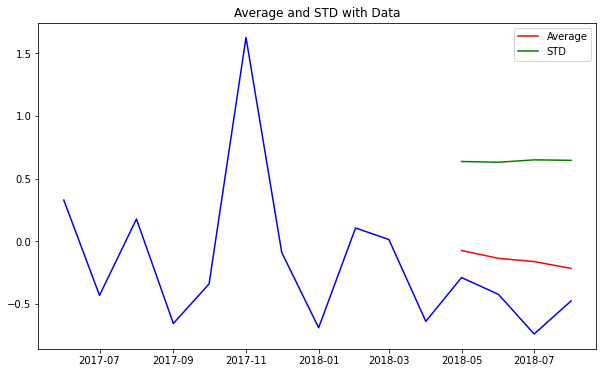



Results of Dickey-Fuller Test: 



Test Statistics             -0.516223
p-Value                      0.888812
#Lags Used                   5.000000
No. of Obeservations Used    9.000000
Critical Value (1%)         -4.473135
Critical Value (5%)         -3.289881
Critical Value (10%)        -2.772382
dtype: float64

In [66]:
# pass original data or log of data or square/cube of data
# data either in Series or DataFrame
test_stationarity(data_LogScale_Minus_movingAverage)

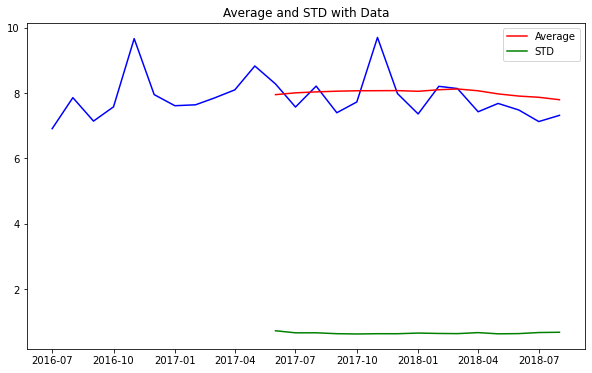



Results of Dickey-Fuller Test: 



Test Statistics              -4.640863
p-Value                       0.000109
#Lags Used                    0.000000
No. of Obeservations Used    25.000000
Critical Value (1%)          -3.723863
Critical Value (5%)          -2.986489
Critical Value (10%)         -2.632800
dtype: float64

In [67]:
test_stationarity(data_logScale)

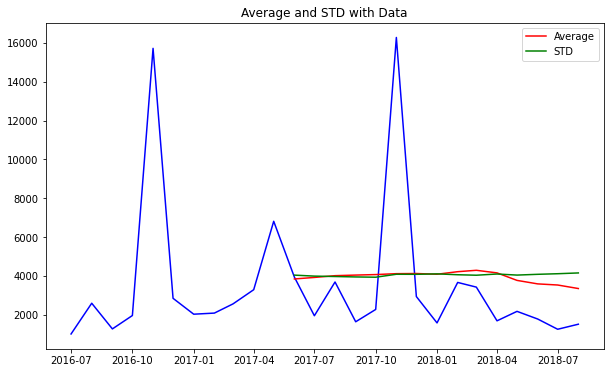



Results of Dickey-Fuller Test: 



Test Statistics              -5.110690
p-Value                       0.000013
#Lags Used                    0.000000
No. of Obeservations Used    25.000000
Critical Value (1%)          -3.723863
Critical Value (5%)          -2.986489
Critical Value (10%)         -2.632800
dtype: float64

In [68]:
test_stationarity(df_new)

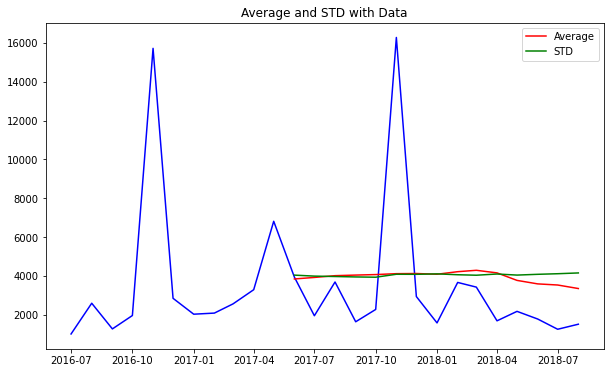



Results of Dickey-Fuller Test: 



Test Statistics              -5.110690
p-Value                       0.000013
#Lags Used                    0.000000
No. of Obeservations Used    25.000000
Critical Value (1%)          -3.723863
Critical Value (5%)          -2.986489
Critical Value (10%)         -2.632800
dtype: float64

In [69]:
test_stationarity(df_new)

In [70]:
#Write reasons which data you are using

# As Seen from above results, we have increasing value of p-value, therefore our original data or data_logScale was sufficient enough to preceed further since it had less p-value
# We are using data_logScale in this case

### Calculate Weighted Average of Time Series

#### Reason: To see the Trends present in Time Series

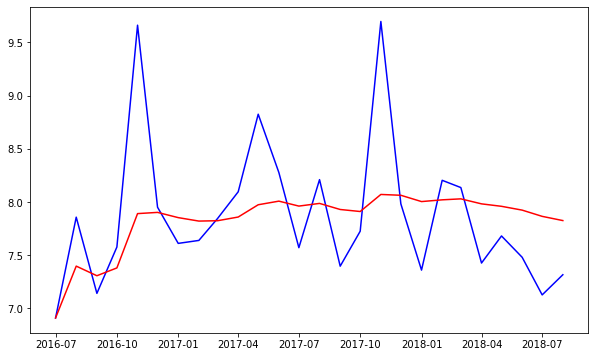

In [71]:
exponentialDecayWeightedAverage = data_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()

plt.figure(figsize = (10, 6))
plt.plot(data_logScale, color = 'blue')
plt.plot(exponentialDecayWeightedAverage, color = 'red')
plt.show()

In [72]:
# The red line in plot above shows data has slightly increased trend

### Calculate diff b/w logScale and exponentialDecayWeightedAverage

In [73]:
data_logScale_Minus_exponentialDecayWeightedAverage = data_logScale - exponentialDecayWeightedAverage

### Test Stationarity

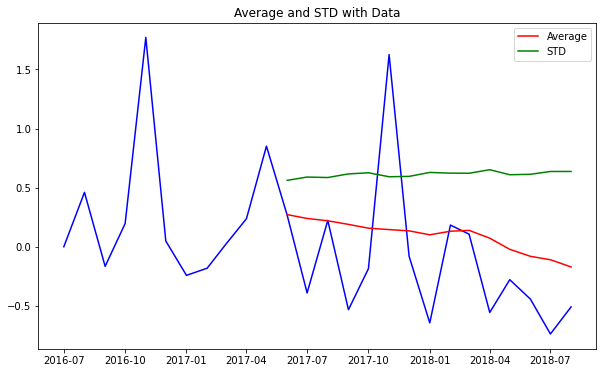



Results of Dickey-Fuller Test: 



Test Statistics               1.361203
p-Value                       0.996931
#Lags Used                    9.000000
No. of Obeservations Used    16.000000
Critical Value (1%)          -3.924019
Critical Value (5%)          -3.068498
Critical Value (10%)         -2.673893
dtype: float64

In [74]:
test_stationarity(data_logScale_Minus_exponentialDecayWeightedAverage)

### Forecasting

In [75]:
# Now we know that our data is stationary

In [76]:
# Now we will shift the values into time series so that we can use it in the forecasting

In [77]:
# Subtract the value of Mean from the actual value 

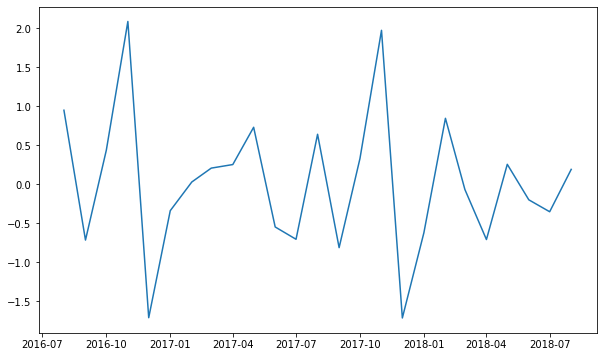

In [78]:
# Here we have taken lag of one or just shifted values by 1
data_shifted = data_logScale - data_logScale.shift()

plt.figure(figsize = (10, 6))
plt.plot(data_shifted)
plt.show()

In [79]:
# ARIMA MODEL

# It has 3 (three) models in it
# 1) AR = Auto Regressive Model
# 2) MA = Moving Average Model
# 3) I = Integration

# It takes 3 (three) parameters
# P, Q, D
# D=1 (since we shifted by 1)
# Calculation of P, Q in later steps

In [80]:
data_shifted.values

array([        nan,  0.94750339, -0.71621761,  0.43559726,  2.08499162,
       -1.71106612, -0.33971693,  0.02779989,  0.20577375,  0.25140143,
        0.72918307, -0.54833438, -0.70619251,  0.63946608, -0.8133782 ,
        0.32865111,  1.97147999, -1.7145937 , -0.62235904,  0.84393193,
       -0.06815358, -0.70937412,  0.25441623, -0.2005682 , -0.35329846,
        0.18951871])

In [81]:
# Drop Any NaN values
data_shifted.dropna(inplace = True)

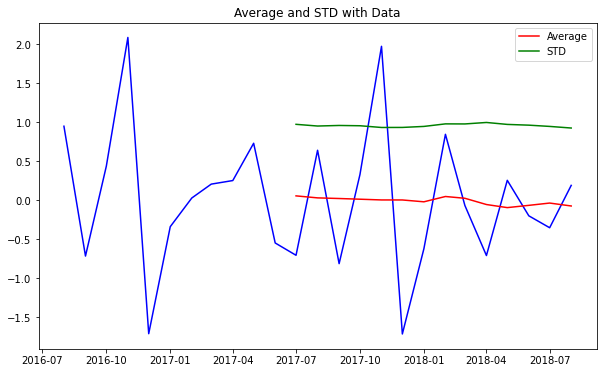



Results of Dickey-Fuller Test: 



Test Statistics             -6.954150e+00
p-Value                      9.523988e-10
#Lags Used                   1.000000e+00
No. of Obeservations Used    2.300000e+01
Critical Value (1%)         -3.752928e+00
Critical Value (5%)         -2.998500e+00
Critical Value (10%)        -2.638967e+00
dtype: float64

In [82]:
test_stationarity(data_shifted)

In [83]:
# Output in above plot is quite flat
# So here you Null_Hypothesis or the augmented 'Dickey-Fuller Test' we take the Null Hypotheis is rejected and hence we can say that time series is stationary now

In [84]:
# Now lets see the componets of time series

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
time_series = data_logScale
decomposition = seasonal_decompose(time_series, model = 'additive')

observed = decomposition.observed # Original
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot 

# plt.figure(figsize = (10, 6))
# plt.subplot(411)
# plt.plot(observed, color = 'blue', label = 'Observed')
# plt.legend(loc = 1)


# plt.subplot(412)
# plt.plot(trend, color = 'black', label = 'Trend')
# plt.legend(loc = 1)


# plt.subplot(413)
# plt.plot(seasonal, color = 'green', label = 'Seasonal')
# plt.legend(loc = 1)


# plt.subplot(414)
# plt.plot(residual, color = 'yellow', label = 'Residual')
# plt.legend(loc = 1)

# plt.tight_layout()
# plt.show() 

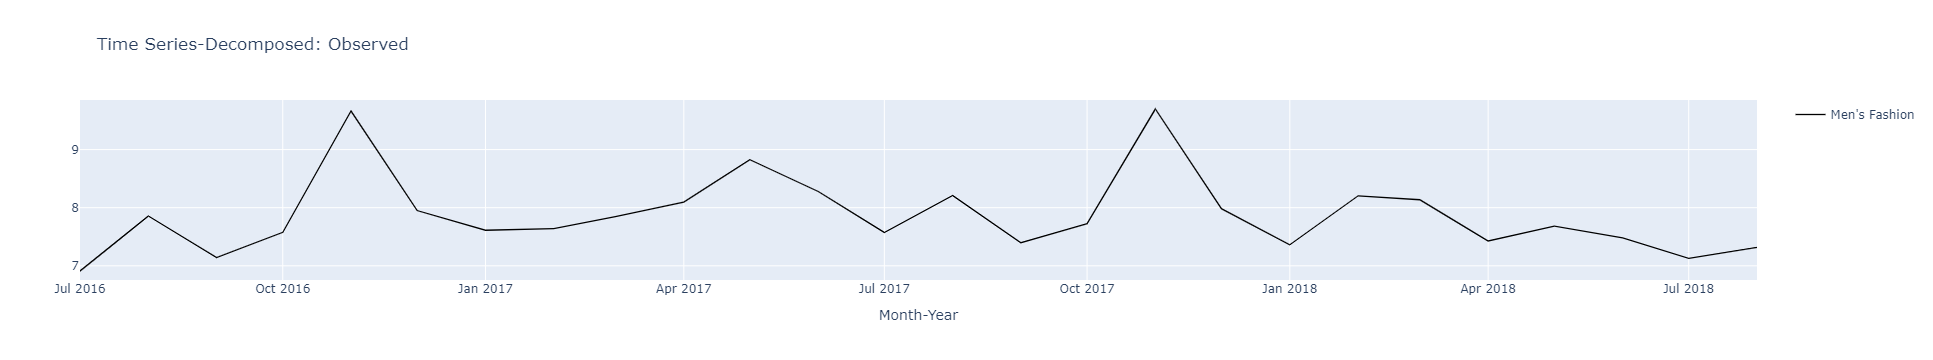

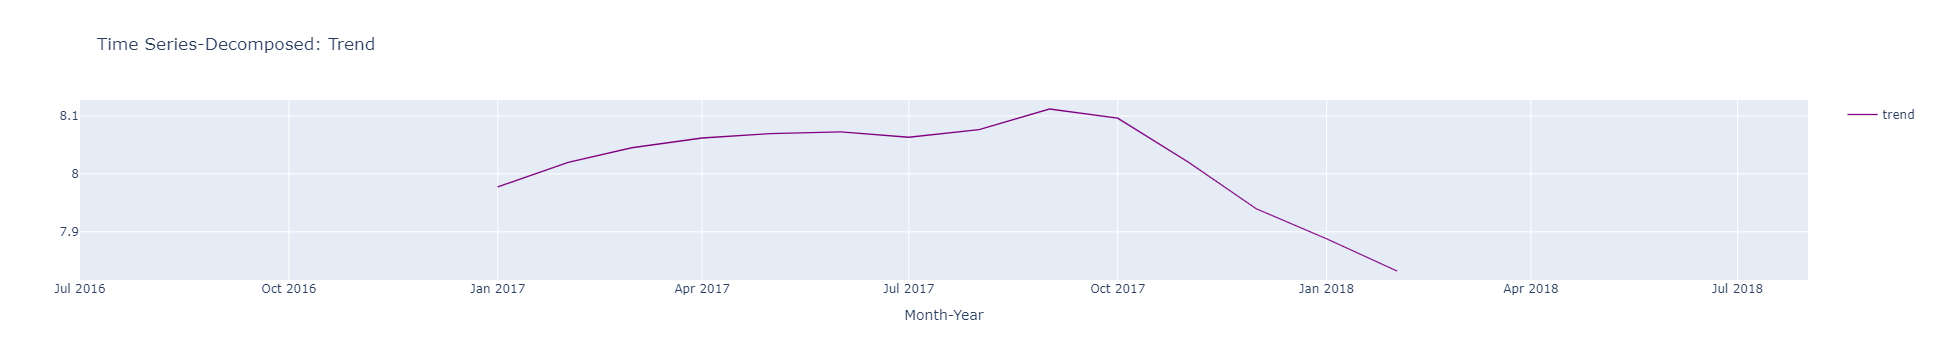

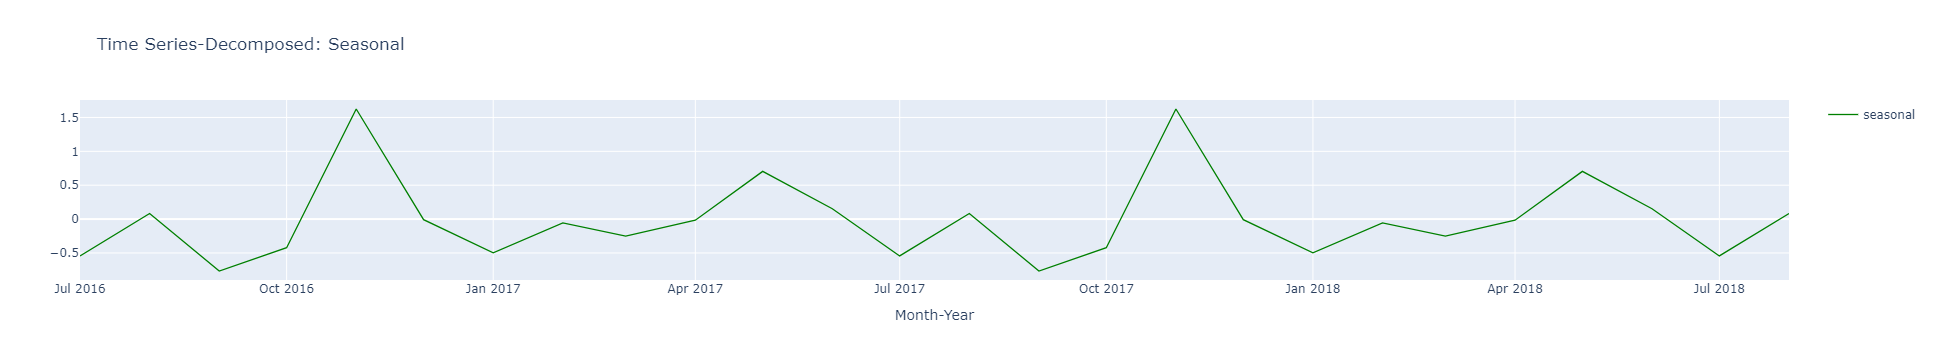

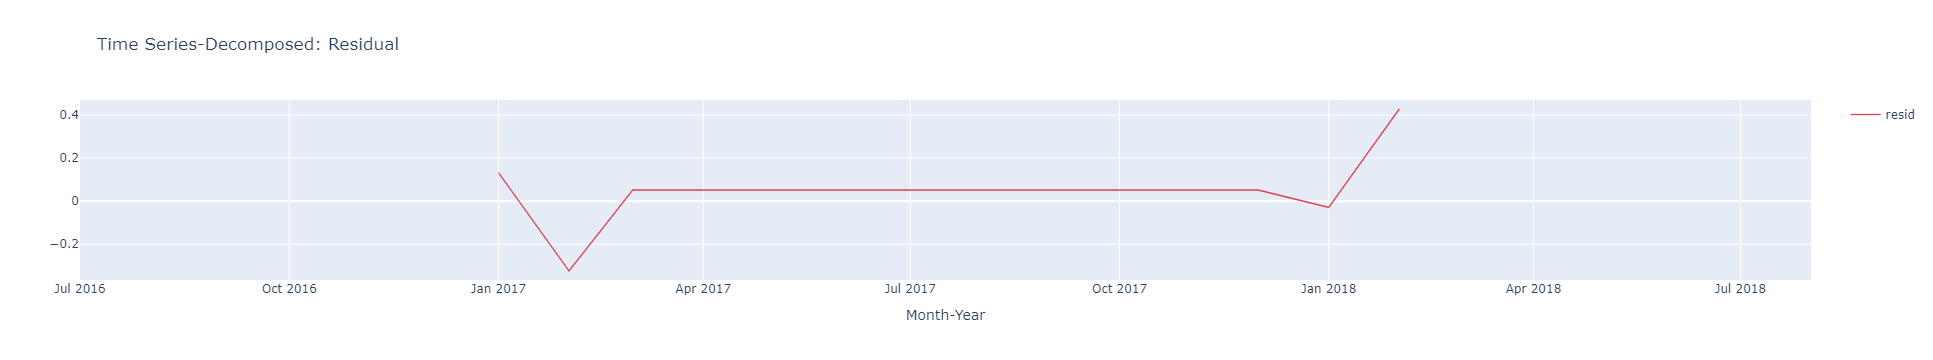

In [86]:
# Plot 
lst_time_series_decompostion = [observed, trend, seasonal, residual]
str_lst = ['Observed', 'Trend', 'Seasonal', 'Residual']
mycolor = ['Black', 'Purple', 'Green', 'Red', 'Blue', 'Orange', 'Grey', 'Violet']

for i in range(len(lst_time_series_decompostion)):
    
    layout = go.Layout(title = "Time Series-Decomposed: " + str_lst[i], 
                   xaxis = {'title': 'Month-Year'}, 
                   #yaxis = {'title': ''}, 
                   showlegend = True, 
                   width = 700, 
                   height = 300)
    
    lst_time_series_decompostion[i].iplot(kind = 'line', layout = layout, color = mycolor[i]) 
    

In [87]:
# Check noise if its stationary or not

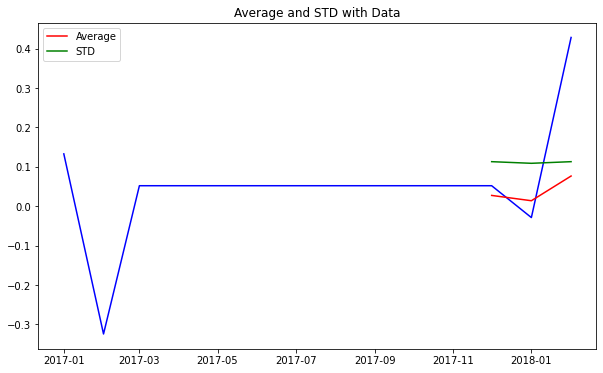



Results of Dickey-Fuller Test: 



Test Statistics              -3.539762
p-Value                       0.007023
#Lags Used                    0.000000
No. of Obeservations Used    13.000000
Critical Value (1%)          -4.068854
Critical Value (5%)          -3.127149
Critical Value (10%)         -2.701730
dtype: float64

In [88]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

### Plot ACF and PACF Graphs

In [89]:
#### ACF will give Q
#### PACF will give P

In [90]:
# from statsmodels.tsa.stattools import acf, pacf

# lag_acf = acf(data_shifted, nlags = 11) #nlag must be less than the half of dataset
# lag_pacf = pacf(data_shifted, nlags = 11, method ='ols')

# # --Plot ACF and PACF Graphs--

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
# fig.suptitle('')

# # Plot ACF Graph

# ax1.plot(lag_acf)
# ax1.axhline(y = 0, linestyle = '--', color = 'grey')
# ax1.axhline(y = -1.96/np.sqrt(len(data_shifted)), linestyle = '--', color = 'grey')
# ax1.axhline(y = 1.96/np.sqrt(len(data_shifted)), linestyle = '--', color = 'grey')
# ax1.set_title("Auto Correlation")

# # Plot PACF Graph

# ax2.plot(lag_pacf)
# ax2.axhline(y = 0, linestyle = '--', color = 'grey')
# ax2.axhline(y = -1.96/np.sqrt(len(data_shifted)), linestyle = '--', color = 'grey')
# ax2.axhline(y = 1.96/np.sqrt(len(data_shifted)), linestyle = '--', color = 'grey')
# ax2.set_title("Partial Auto Correlation")

# plt.tight_layout()
# plt.show()

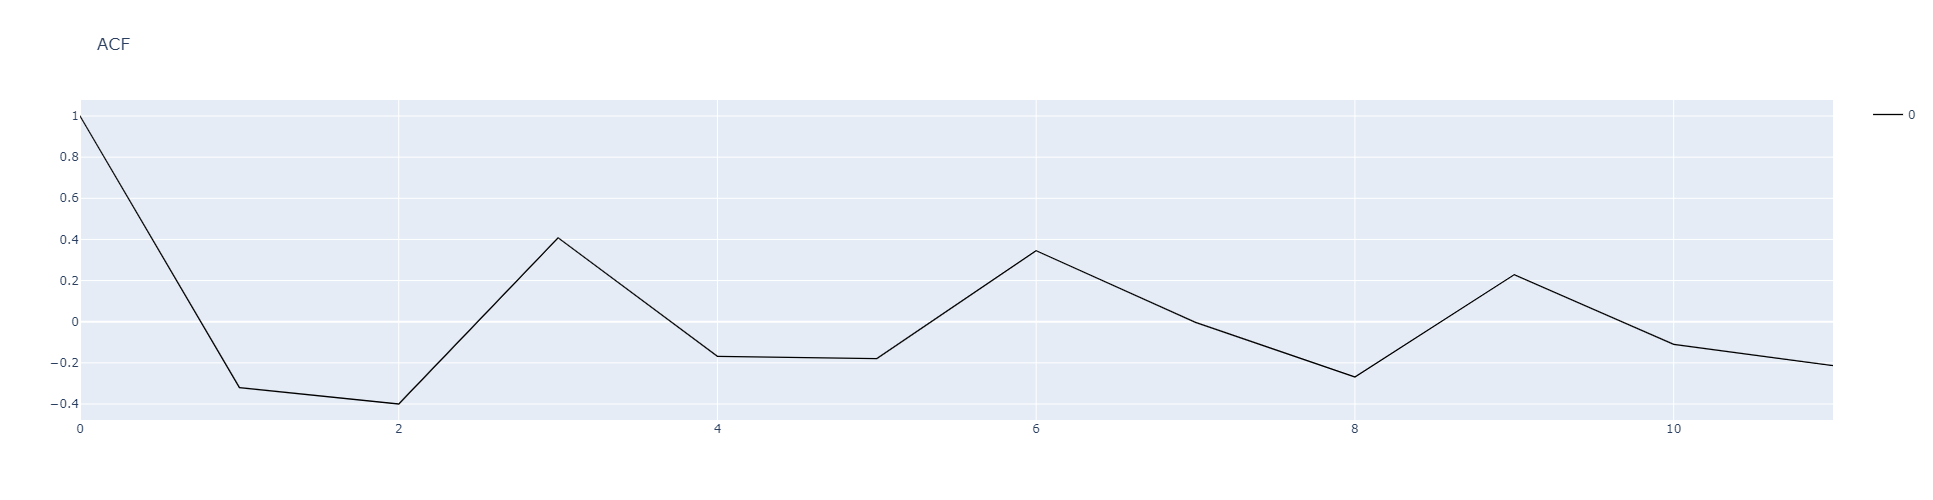

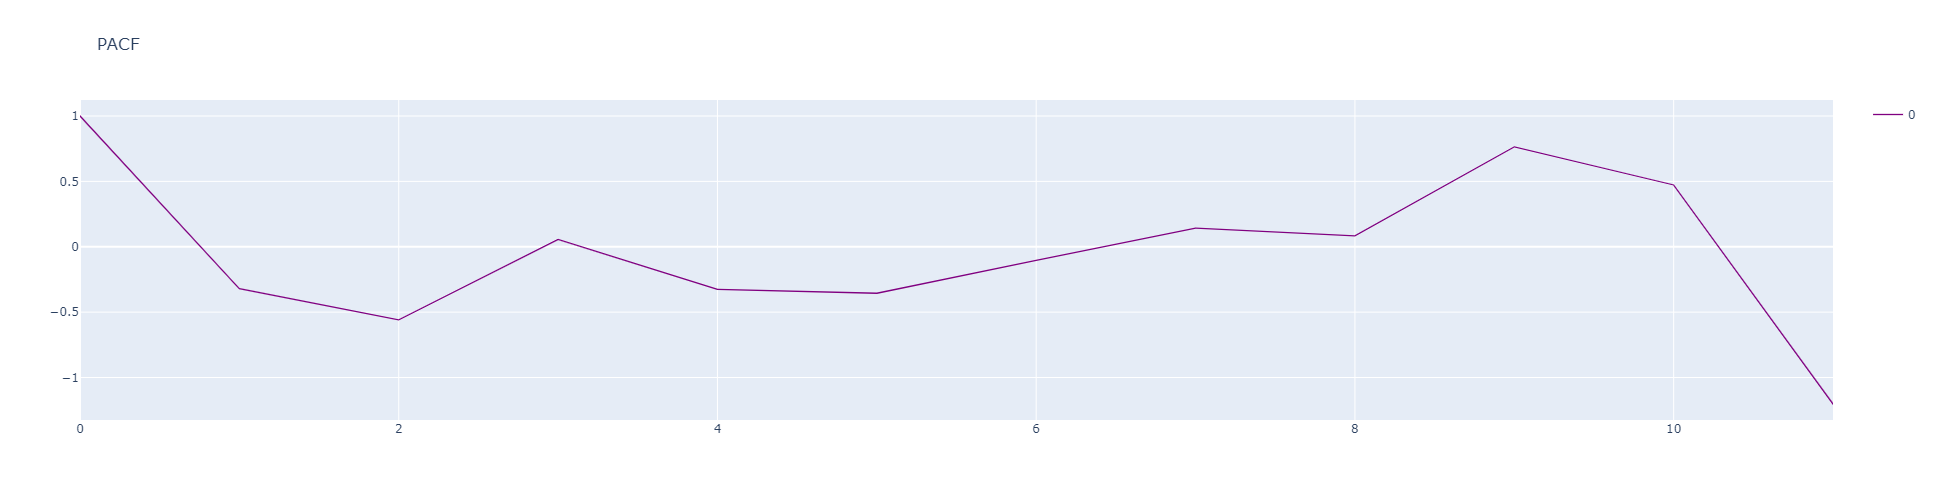

In [91]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_shifted, nlags = 11) #nlag must be less than the half of dataset
lag_pacf = pacf(data_shifted, nlags = 11, method ='ols')

lag_acf = pd.DataFrame(lag_acf)
lag_pacf = pd.DataFrame(lag_pacf)

# Plot

lag_acf_pacf = [lag_acf, lag_pacf]
lst_lag_acf_pacf = ['ACF', 'PACF']
mycolor = ['Black', 'Purple', 'Green', 'Red', 'Blue', 'Orange', 'Grey', 'Violet']

for i in range(len(lag_acf_pacf)):
    
    layout = go.Layout(title = lst_lag_acf_pacf[i], 
                   #xaxis = {'title': 'Month-Year'}, 
                   #yaxis = {'title': ''}, 
                   showlegend = True, 
                   width = 700, 
                   height = 500, hovermode = 'closest' )
    
    lag_acf_pacf [i].iplot(kind = 'line', layout = layout, color = mycolor[i]) 

In [92]:
# Now look for x-axis value when y = 0 
# in both graphs values on x-axis are 1, therefore
# P, Q = 1 (alsmost)

### ARIMA Model

In [93]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
## AR Model

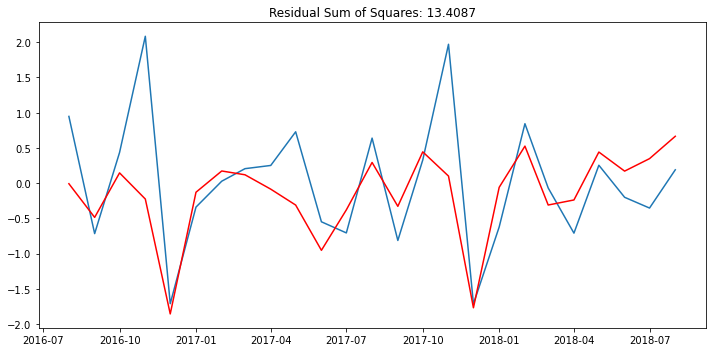

In [95]:
model = ARIMA(data_logScale, order = (0, 1, 1)) #p = 0, d = 1, q = 1
results_AR = model.fit(disp = -1)

plt.figure(figsize = (10, 5))
plt.plot(data_shifted)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('Residual Sum of Squares: %.4f'% sum((results_AR.fittedvalues - data_shifted)**2))
plt.tight_layout()
plt.show()

In [96]:
# ideal Rss = 1.0292
# RSS value in this case is quite high 

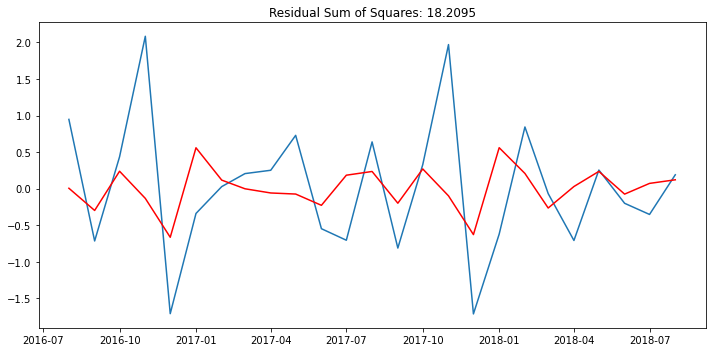

In [97]:
## MA Model

model = ARIMA(data_logScale, order = (1, 1, 0)) #p = 0, d = 1, q = 0
results_MA = model.fit(disp = -1)

plt.figure(figsize = (10, 5))
plt.plot(data_shifted)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('Residual Sum of Squares: %.4f'% sum((results_MA.fittedvalues - data_shifted)**2))
plt.tight_layout()
plt.show()

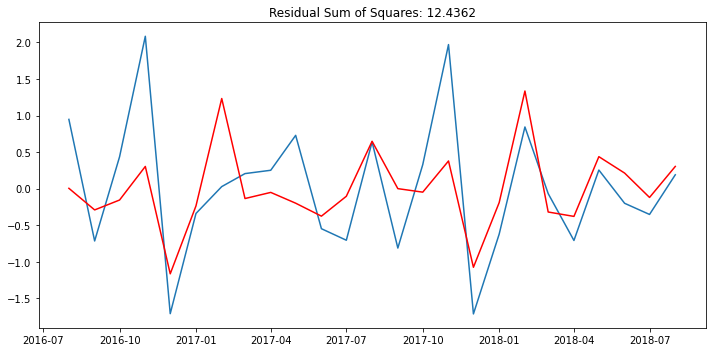

In [98]:
# ARIMA Model
model = ARIMA(data_logScale, order = (2, 1, 1)) #p = 1, d = 1, q = 1
results_ARIMA = model.fit(disp = -1)

plt.figure(figsize = (10, 5))
plt.plot(data_shifted)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('Residual Sum of Squares: %.4f'% sum((results_ARIMA.fittedvalues - data_shifted)**2))
plt.tight_layout()
plt.show()

In [99]:
# Combined RSS must be less
# in this case RSS too high in any case
# which is trouble

In [100]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

M-Y
2016-08-01    0.004364
2016-09-01   -0.291365
2016-10-01   -0.155882
2016-11-01    0.303622
2016-12-01   -1.165771
dtype: float64

In [101]:
# Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

M-Y
2016-08-01    0.004364
2016-09-01   -0.287000
2016-10-01   -0.442882
2016-11-01   -0.139261
2016-12-01   -1.305031
dtype: float64

In [102]:
data_logScale.index

DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='M-Y', freq=None)

In [103]:
type(data_logScale)

pandas.core.series.Series

In [104]:
predictions_ARIMA = pd.Series(data_logScale)

In [105]:
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA.head()

M-Y
2016-07-01    6.910751
2016-08-01    7.862619
2016-09-01    6.855036
2016-10-01    7.134752
2016-11-01    9.523365
dtype: float64

In [106]:
# Since we took the log earlier, therefore convert it back
predictions_ARIMA = np.exp(predictions_ARIMA)

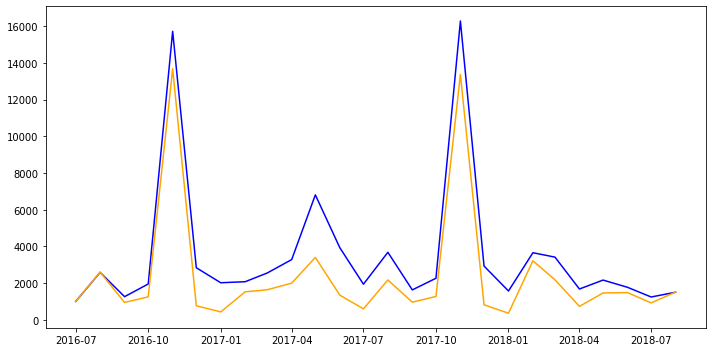

In [107]:
plt.figure(figsize = (10, 5))
plt.plot(df_new, color = 'blue')
plt.plot(predictions_ARIMA, color = 'orange')
plt.tight_layout()
plt.show()

In [108]:
len(data_logScale)

26

In [109]:
data_logScale

M-Y
2016-07-01    6.910751
2016-08-01    7.858254
2016-09-01    7.142037
2016-10-01    7.577634
2016-11-01    9.662625
2016-12-01    7.951559
2017-01-01    7.611842
2017-02-01    7.639642
2017-03-01    7.845416
2017-04-01    8.096817
2017-05-01    8.826001
2017-06-01    8.277666
2017-07-01    7.571474
2017-08-01    8.210940
2017-09-01    7.397562
2017-10-01    7.726213
2017-11-01    9.697693
2017-12-01    7.983099
2018-01-01    7.360740
2018-02-01    8.204672
2018-03-01    8.136518
2018-04-01    7.427144
2018-05-01    7.681560
2018-06-01    7.480992
2018-07-01    7.127694
2018-08-01    7.317212
Name: Men's Fashion, dtype: float64

<Figure size 720x360 with 0 Axes>

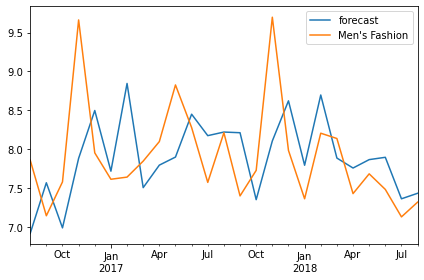

In [110]:
plt.figure(figsize = (10, 5))
results_ARIMA.plot_predict(start = 1, end = 25)
plt.tight_layout()
plt.show() 
#results_ARIMA.forecast(steps = 100)


# start = 24 # which is the index position in time series
#end = 24 + 3 # 3 is no. of data points for future